# Purchased Knn

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)
options("scipen"=100, "digits"=4)
if(!require("readr")) install.packages("readr")
if(!require("knitr")) install.packages("knitr")
if(!require("Metrics")) install.packages("Metrics")
if(!require("class")) install.packages("class")
library("readr")
library("Metrics")
library("class")
library("knitr")
knitr::opts_chunk$set(fig.width=4, fig.height=4)
normalize <- function(x) {
    return ( (x-min(x))/(max(x)-min(x)) )
}

## Using Knn to predict will Purchase

So here is the data we have, this will be our training data:

-   `Purchased` is our result or outcome
-   `Salary`, `Age` are the predictors

This data is about what kinds of customers responded to an email ad
offering a special deal on a product. Were they high salary or low
salary and what about their age? We would like to know if `Salary` and
`Age` of the customer can predict whether they bought an item based on
the offer they received.

Here is our training set:

| Salary | Age | Purchased |
|--------|-----|-----------|
| 53700  | 41  | no        |
| 65300  | 37  | no        |
| 48900  | 45  | yes       |
| 64800  | 49  | yes       |
| 69200  | 30  | yes       |
| 55900  | 57  | yes       |
| 48600  | 26  | no        |
| 72000  | 60  | yes       |
| 45300  | 34  | no        |
| 69000  | 32  | yes       |
| 73200  | 52  | yes       |

Lets read it in:

In [ ]:
trainurl<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vTx21HIv4xKL2c94OLQzMiNPmv5YXw-vAy3dRBL0gnknSMKMK4Ur_4nYGGyDtvS20iU3_r-_zZfQQmj/pub?gid=0&single=true&output=csv"
traindf<-read.csv(trainurl, stringsAsFactors=TRUE)
str(traindf)

'data.frame':   11 obs. of  3 variables:
 $ Salary   : int  53700 65300 48900 64800 69200 55900 48600 72000 45300 69000 ...
 $ Age      : int  41 37 45 49 30 57 26 60 34 32 ...
 $ Purchased: Factor w/ 2 levels "no","yes": 1 1 2 2 2 2 1 2 1 2 ...

Lets print it out to make sure it looks okay:

In [ ]:
print(traindf)

   Salary Age Purchased
1   53700  41        no
2   65300  37        no
3   48900  45       yes
4   64800  49       yes
5   69200  30       yes
6   55900  57       yes
7   48600  26        no
8   72000  60       yes
9   45300  34        no
10  69000  32       yes
11  73200  52       yes

Lets take a look at a graph of the two predictors:

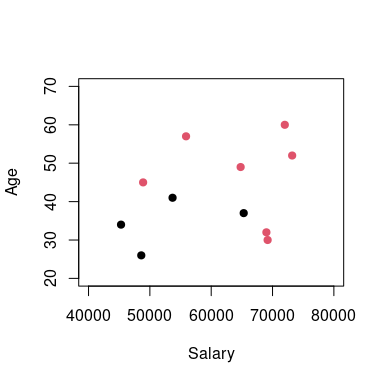

In [ ]:
plot(traindf$Salary, traindf$Age, col=traindf$Purchased, 
     pch=19,
     xlab="Salary",
     ylab="Age",
     xlim=c(40000,80000), ylim=c(20,70))

Red dots represent “yes” and black dots represent “no”

We are going to model this situation using Knn (K nearest neighbors):

Knn needs both the training and the test set passed to it:

Here is our test set:

| Salary | Age | Purchased |
|--------|-----|-----------|
| 53900  | 45  | yes       |
| 64800  | 49  | yes       |
| 50000  | 32  | no        |
| 55900  | 57  | yes       |
| 55600  | 29  | no        |
| 60000  | 25  | no        |

Lets read it in:

In [ ]:
#read the testing set
testurl<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vTx21HIv4xKL2c94OLQzMiNPmv5YXw-vAy3dRBL0gnknSMKMK4Ur_4nYGGyDtvS20iU3_r-_zZfQQmj/pub?gid=572053114&single=true&output=csv"
testdf<-read.csv(testurl, stringsAsFactors=TRUE)
str(testdf)

'data.frame':   8 obs. of  3 variables:
 $ Salary   : int  53900 64800 50000 55900 55600 60000 80000 66000
 $ Age      : int  45 49 32 57 29 25 30 62
 $ Purchased: Factor w/ 2 levels "no","yes": 2 2 1 2 2 1 2 2

Lets print it out:

In [ ]:
print(testdf)

  Salary Age Purchased
1  53900  45       yes
2  64800  49       yes
3  50000  32        no
4  55900  57       yes
5  55600  29       yes
6  60000  25        no
7  80000  30       yes
8  66000  62       yes

Now lets extract the last column of the training dataset since we need
it as the ‘cl’ argument in the knn function. We also remove the
`Purchased` column from both the training and the testing data frames
since knn expects these both to have no result column.

Before we remove it from each dataframe though we save it in a vector:

In [ ]:
train_target <- traindf$Purchased 
traindf$Purchased <- NULL

test_target <- testdf$Purchased
testdf$Purchased <- NULL

print(traindf)

   Salary Age
1   53700  41
2   65300  37
3   48900  45
4   64800  49
5   69200  30
6   55900  57
7   48600  26
8   72000  60
9   45300  34
10  69000  32
11  73200  52

Now before we run the Knn algorithm, we need to normalize (or rescale)
the predictors. The following code normalizes both the predictor columns
in the each of our dataframes:

In [ ]:
traindf_n <- as.data.frame(lapply(traindf, normalize))
testdf_n <- as.data.frame(lapply(testdf, normalize))
print(traindf_n)

   Salary    Age
1  0.3011 0.4412
2  0.7168 0.3235
3  0.1290 0.5588
4  0.6989 0.6765
5  0.8566 0.1176
6  0.3799 0.9118
7  0.1183 0.0000
8  0.9570 1.0000
9  0.0000 0.2353
10 0.8495 0.1765
11 1.0000 0.7647

Notice how the predictors are all normalized into the range 0.0 to 1.0

Next we call the knn method, which creates the model using the training
data, then does predictions for the testing data, and returns the
predictions all at once. You must also pass a k value to tell the method
how many “nearest neighbors” to use for the model.

In [ ]:
set.seed(1234)
prediction<-knn(traindf_n, testdf_n, cl=train_target, k=3)
print(prediction)

[1] no  yes no  yes no  no  yes yes
Levels: no yes

We put the actuals and predictions back into the test data frame so we
can check accuracy:

In [ ]:
testdf$Purchased <- test_target
testdf$Prediction <- prediction
print(testdf)

  Salary Age Purchased Prediction
1  53900  45       yes         no
2  64800  49       yes        yes
3  50000  32        no         no
4  55900  57       yes        yes
5  55600  29       yes         no
6  60000  25        no         no
7  80000  30       yes        yes
8  66000  62       yes        yes

Here is the confusion matrix and the accuracy:

In [ ]:
table(prediction=prediction,actual=test_target)

          actual
prediction no yes
       no   2   2
       yes  0   4

[1] 0.75

Lets look at some plots of the test data values.

First we normalize the predictors for those test values:

In [ ]:
normSalary<-normalize(testdf_n$Salary)
normAge<-normalize(testdf_n$Age)

Now lets examine the 1st data value in the test set:

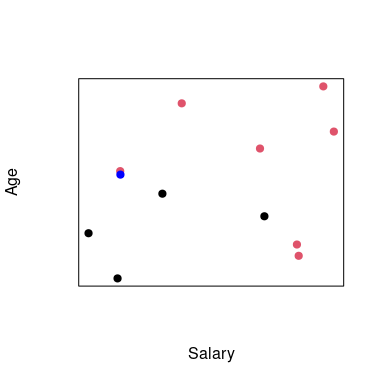

  Salary Age Purchased Prediction
1  53900  45       yes         no

In [ ]:
plot(traindf_n$Salary, traindf_n$Age, col=train_target, pch=19, xlab="Salary", ylab="Age", xaxt='n', yaxt='n') 
points(normSalary[1], normAge[1], pch=19, col="blue")

Here is the 2nd data value in the testing set:

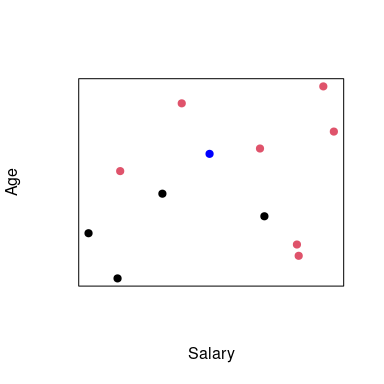

  Salary Age Purchased Prediction
2  64800  49       yes        yes

In [ ]:
plot(traindf_n$Salary, traindf_n$Age, col=train_target, pch=19, xlab="Salary", ylab="Age", xaxt='n', yaxt='n') 
points(normSalary[2], normAge[2], pch=19, col="blue")

Here is the 3nd data value in the testing set:

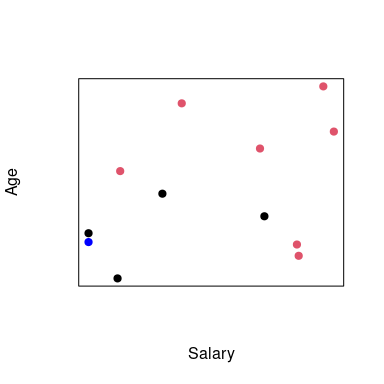

  Salary Age Purchased Prediction
3  50000  32        no         no

In [ ]:
plot(traindf_n$Salary, traindf_n$Age, col=train_target, pch=19, xlab="Salary", ylab="Age", xaxt='n', yaxt='n') 
points(normSalary[3], normAge[3], pch=19, col="blue")

Here is the 4th data value in the testing set:

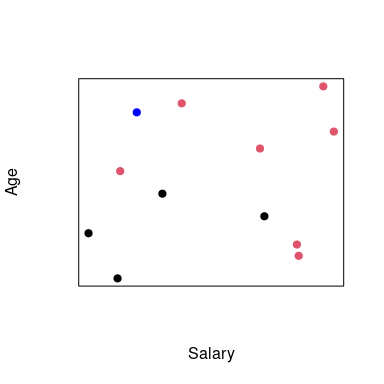

  Salary Age Purchased Prediction
4  55900  57       yes        yes

In [ ]:
plot(traindf_n$Salary, traindf_n$Age, col=train_target, pch=19, xlab="Salary", ylab="Age", xaxt='n', yaxt='n') 
points(normSalary[4], normAge[4], pch=19, col="blue")

Here is the 5th data value in the testing set:

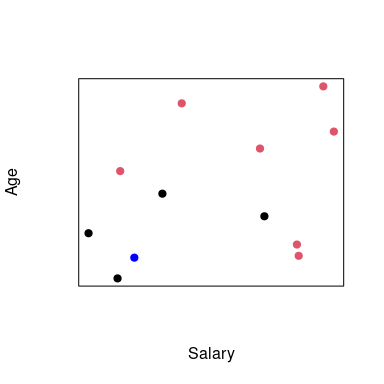

  Salary Age Purchased Prediction
5  55600  29       yes         no

In [ ]:
plot(traindf_n$Salary, traindf_n$Age, col=train_target, pch=19, xlab="Salary", ylab="Age", xaxt='n', yaxt='n') 
points(normSalary[5], normAge[5], pch=19, col="blue")

Here is the 6th data value in the testing set:

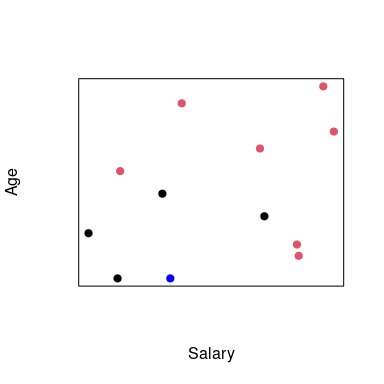

  Salary Age Purchased Prediction
6  60000  25        no         no

In [ ]:
plot(traindf_n$Salary, traindf_n$Age, col=train_target, pch=19, xlab="Salary", ylab="Age", xaxt='n', yaxt='n') 
points(normSalary[6], normAge[6], pch=19, col="blue")